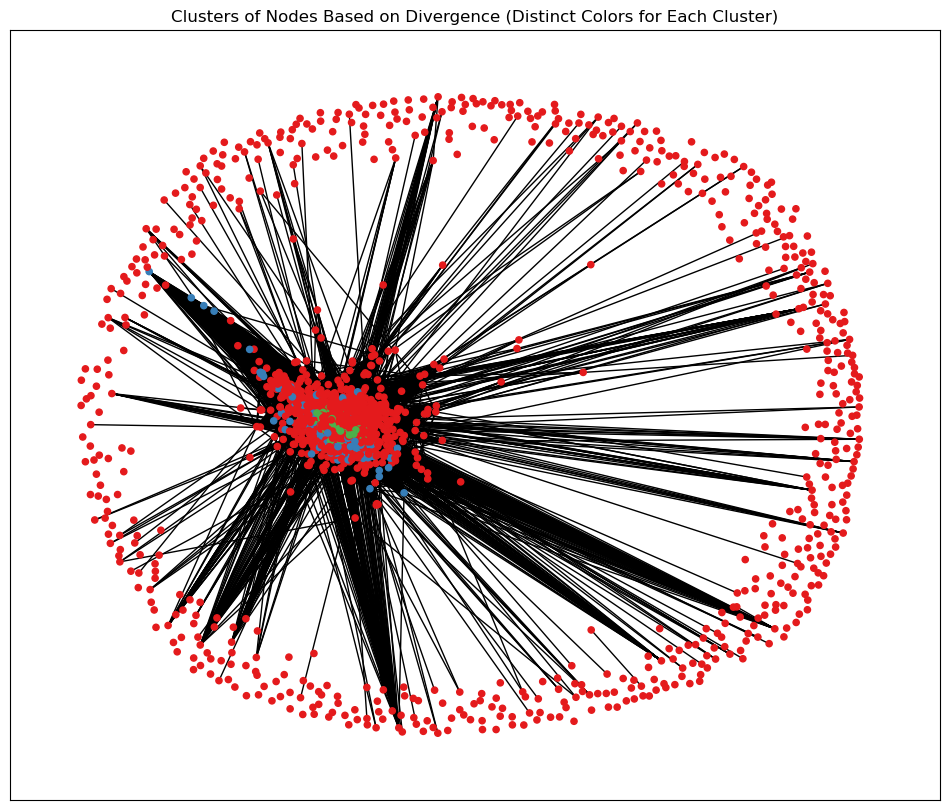

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


# Load the adjacency matrix
file_path = '/Users/gianmarcoferrara/ComplexNetworksProject/adjacency_matrix_1.csv'  # Replace with your actual file path
adjacency_matrix = pd.read_csv(file_path, index_col=0)

# Ensure the DataFrame's index and columns match by reassigning columns from the index
adjacency_matrix.columns = adjacency_matrix.index

# Create a directed graph from the adjacency matrix
G = nx.from_pandas_adjacency(adjacency_matrix, create_using=nx.DiGraph)

# Calculate raw out-degree and in-degree
out_degree = dict(G.out_degree())
in_degree = dict(G.in_degree())

# Calculate divergence
divergence_raw = {node: out_degree[node] - in_degree[node] for node in G.nodes}

# Prepare data for K-means clustering on divergence values
divergence_values = np.array(list(divergence_raw.values())).reshape(-1, 1)

# Define number of clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
node_clusters = kmeans.fit_predict(divergence_values)

# Map clusters to node IDs
clustered_nodes = {node: cluster for node, cluster in zip(G.nodes, node_clusters)}

# Visualize clusters with distinct colors
plt.figure(figsize=(12, 10))
colors = plt.colormaps["Set1"].colors[:num_clusters] 
nx.draw_networkx(
    G, 
    pos=nx.spring_layout(G, seed=42),
    node_color=[colors[clustered_nodes[node]] for node in G.nodes],
    with_labels=False,
    node_size=20,
    arrows=False
)

plt.title("Clusters of Nodes Based on Divergence (Distinct Colors for Each Cluster)")
plt.show()